# T03: Linear regression

## MATH 4432 Statistical Machine Learning

TA: WANG Zhiwei, HKUST

Date: 2022-09-20

In [1]:
set.seed(100)
library(ggplot2)

## Estimating the variance of parameters

Recall the least squares problem for multiple linear regression
$$\hat{\beta} = \mathrm{argmin}_{\beta}||\mathbf{y} - \mathbf{X} \beta||_2^2.$$
The least squares estimate of $\beta$ is equivalent to the one obtained by maximizing the log-likelihood of data
$$\hat{\beta} = \mathrm{argmax}_{\beta}\ \mathcal{L}(\beta) = \mathrm{argmax}_{\beta}\ \log(p(\mathbf{y}|\mathbf{X})),\ \text{where}\ \mathbf{y}|\mathbf{X}\sim\mathcal{N}(\mathbf{X} \beta,\sigma_e^2\mathbf{I})$$
$$\iff \hat{\beta} = \mathrm{argmax}_{\beta}\ - \frac{n}{2} \log \sigma_e^2 - \frac{1}{2\sigma_e^2}(\mathbf{y} - \mathbf{X} \beta)^T(\mathbf{y} - \mathbf{X} \beta).$$
The second approach is called the Maximum Likelihood Estimate (MLE). 
As demonstrated in the class, we can obtain the estimate of $\beta$ through either of the above objective funcions
$$\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.$$
We can also estimate the variance of the residual errors
$$\hat{\sigma_e^2} = \mathrm{argmax}_{\sigma_e^2}\ \mathcal{L}(\sigma_e^2) = \frac{1}{n} (\mathbf{y} - \mathbf{X} \beta)^T(\mathbf{y} - \mathbf{X} \beta).$$
We can further modify this biased estimation
$$\hat{\sigma_e^2} = \frac{1}{n - p} (\mathbf{y} - \mathbf{X} \beta)^T(\mathbf{y} - \mathbf{X} \beta).$$
The MLE additionally provides the standard error estimates of $\hat{\beta}$ using the inverse of the observed Fisher information matrix.
$$\text{Var}(\hat{\beta}) = \mathcal{I}^{-1} = \left(- \frac{\partial^2 \mathcal{L}(\beta)}{\partial \beta^2}\right)^{-1} = \sigma_e^2(\mathbf{X}^T \mathbf{X})^{-1}.$$

In [2]:
# R code for linear regression
# A linear regression function
# input: n by p design matrix X; n - vector y
# output: coefficient estimates beta;
# residual variance estimate sig2;
# standard errors of beta;
# t-statistics of beta;
# p-values of beta
# Rsquare: 1- RSS/TSS
# RSS: residual sum of squares; TSS: Total sum of squares

linReg <- function (X, y) {
    n <- nrow(X) # Sample size
    p <- ncol(X) # Number of features
    
    X <- cbind(1, X) # Design matrix
    invK <- solve(t(X) %*% X) # Inverse of XTX
    beta <- invK %*% (t(X) %*% y) # Estimate beta
    
    residual <- y - X %*% beta
    Rsq <- 1 - sum(residual^2)/sum((y - mean(y))^2) # R square: ratio of "explained" variance to the "total" variance of y
    sig2 <- sum(residual^2)/(n - p - 1) # Why (n - p - 1)?
    
    Sig_beta <- sig2 * invK # Variance of estimation of beta
    se <- sqrt(diag(Sig_beta)) # Standard error
    t <- beta/se # t-statistics
    pval <- pt(abs(t), n - p - 1, lower.tail = F) * 2 # p-value
    return(list(beta = beta, sig2 = sig2, se = se, t = t, pval = pval, Rsq = Rsq))
}

## A toy example

### Setting

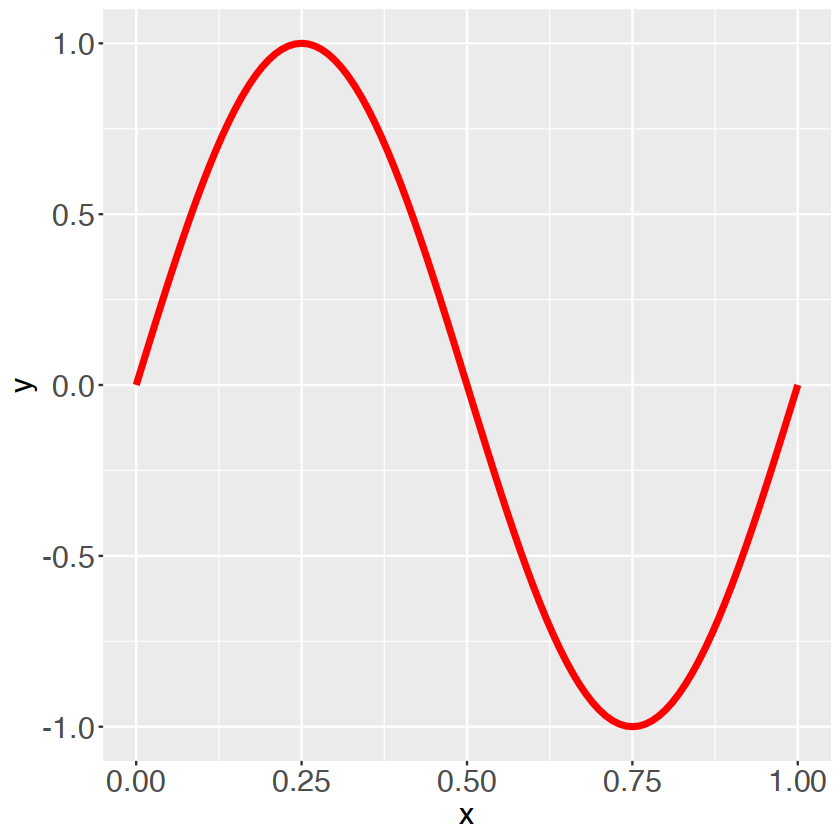

In [3]:
x <- seq(0, 1, 0.01)
ggplot(data = NULL, aes(x = x, y = sin(2 * pi * x))) +
    geom_line(color = "red", size = 1.5) +
    ylab("y") +
    theme(
        text = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18)
    )

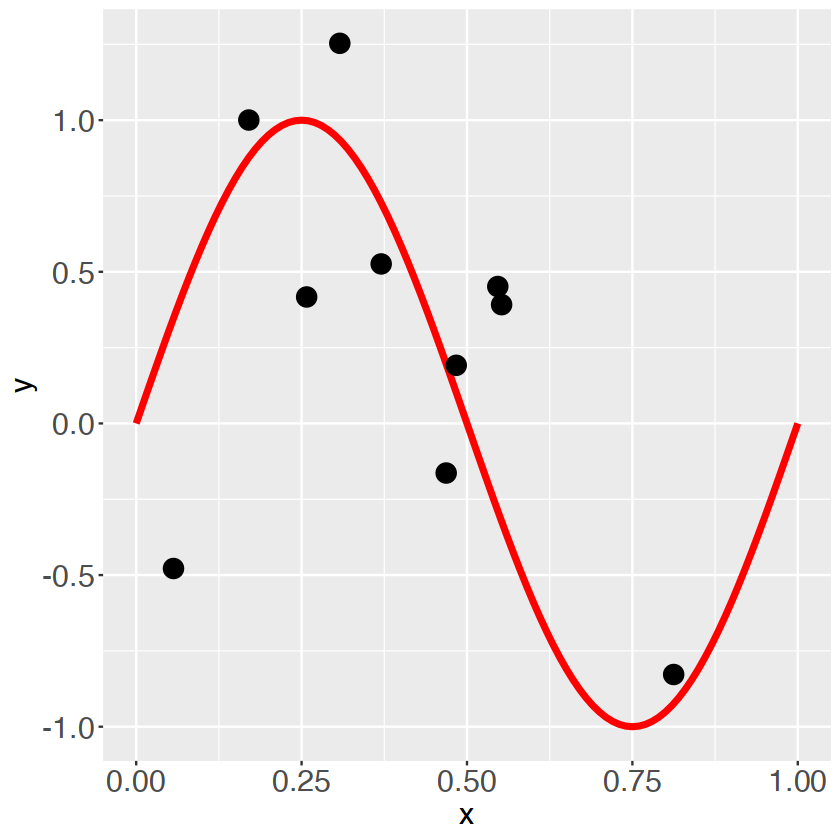

In [4]:
n <- 10 # Sample size
X <- runif(n, 0, 1)
y0 <- sin(2 * pi * X) # Ground truth
y <- y0 + rnorm(n, 0, 1)

ggplot(data = NULL) +
    geom_line(aes(x = x, y = sin(2 * pi * x)), color = "red", size = 1.5) + # Ground truth
    geom_point(aes(x = X, y = y), size = 5) + # Observed data
    ylab("y") +
    theme(
        text = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18)
    )

### Fit linear regression model with two parameters (intercept and first order term)

In [5]:
fit1 <- linReg(data.matrix(X), data.matrix(y))
fit1

0.7231929
-1.1102532
1.686017
-1.171308
0.1302789
0.2751772


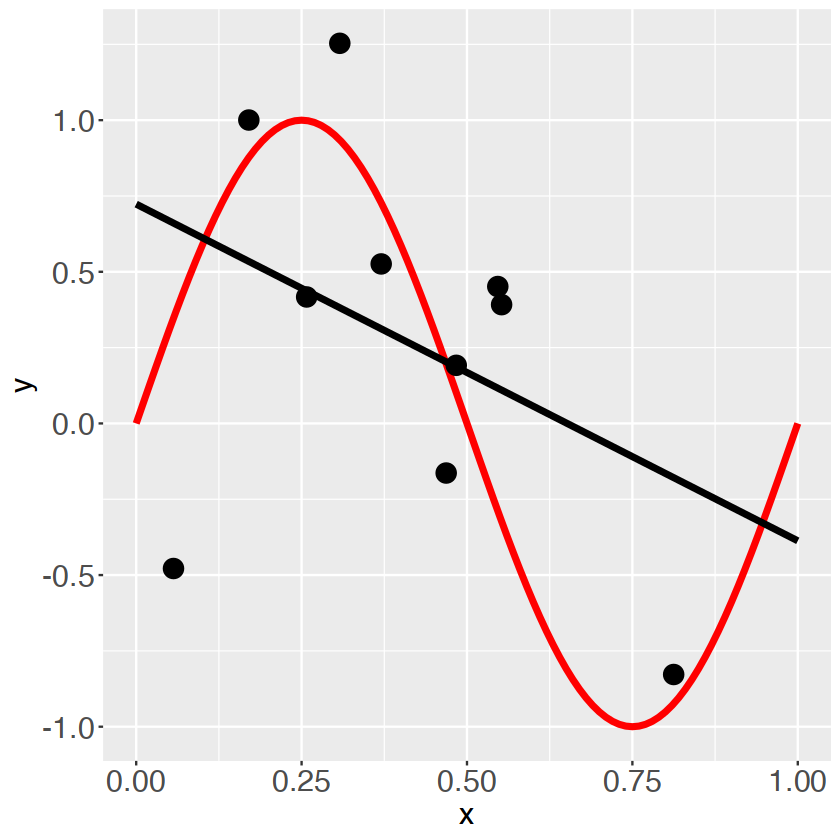

In [6]:
yhat1 <- fit1$beta[1] + fit1$beta[2] * x
ggplot(data = NULL) +
    geom_line(aes(x = x, y = sin(2 * pi * x)), color = "red", size = 1.5) + # Ground truth
    geom_point(aes(x = X, y = y), size = 5) + # Observed data
    geom_line(aes(x = x, y = yhat1), size = 1.5) + # Fitted value
    ylab("y") +
    theme(
        text = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18)
    )

### Fit linear regression model with four parameters (intercept and first three order term)

In [7]:
X3 <- cbind(X, X^2, X^3)
fit3 <- linReg(X3, data.matrix(y))
fit3

,-1.012214
X,14.300349
,-33.234188
,19.699277
,-1.416918
X,2.062012
,-1.806992
,1.432269
,0.20627610
X,0.08481994
,0.12077715


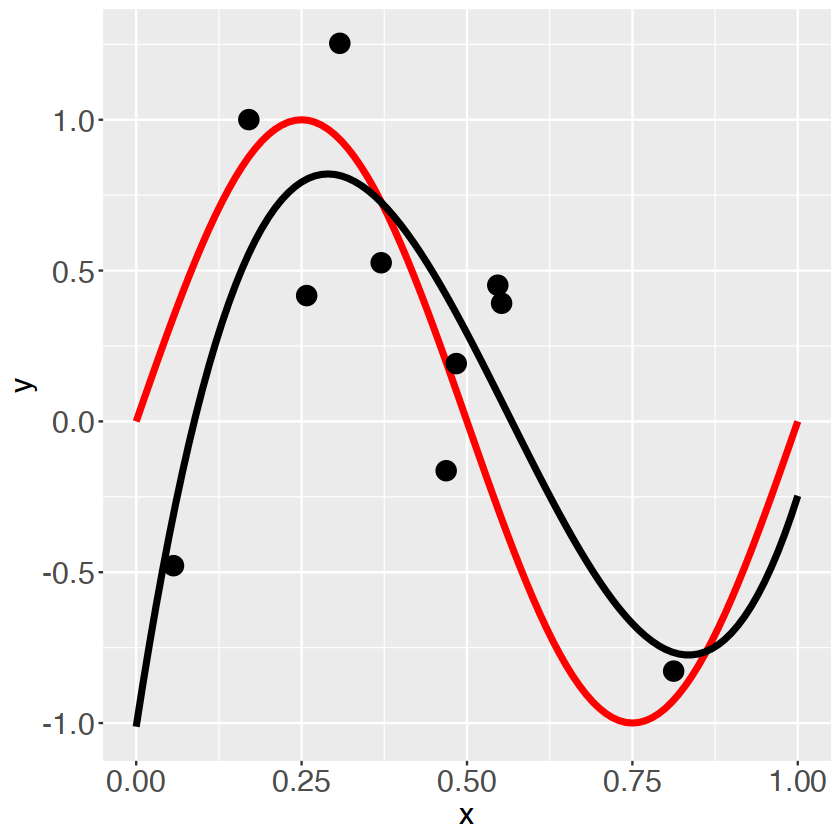

In [8]:
yhat3 <- cbind(1, x, x^2, x^3)%*%fit3$beta
ggplot(data = NULL) +
    geom_line(aes(x = x, y = sin(2 * pi * x)), color = "red", size = 1.5) + # Ground truth
    geom_point(aes(x = X, y = y), size = 5) + # Observed data
    geom_line(aes(x = x, y = yhat3), size = 1.5) + # Fitted value
    ylab("y") +
    theme(
        text = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18)
    )

## Use linear rgression to fit data in R

- Basic functions that perform least squares linear regression and other simple analyses come standard with the base distribution, but more exotic functions require additional libraries. 

- Here we load the `MASS` package, which is a very large collection of data sets and functions. We also load the `ISLR` package, which includes the data sets associated with ISLR book. If you haven't installed these two packages before, use `install.packages()` to install them.

- Install other packages.

In [9]:
# Chapter 3 Lab: Linear Regression
## Here we load the MASS package, which is a very large collection of data sets and functions
library(MASS)
## We also load the ISLR package, which includes the data sets associated with the text book
library(ISLR)

The `MASS` library contains the __Boston__ data set, which records medv (median house value) for 506 neighborhoods around Boston.
We will seek to predict medv using 13 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socio economic status).

In [10]:
names(Boston) # Print the variable names of the data frame
head(Boston) # Print the first several rows of the data frame

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### Simple Linear Regtession

- We start by using the `lm()` function to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor.

In [11]:
lm.fit <- lm(medv ~ lstat, data = Boston) # Fit linear regression using Boston data

- If we type `lm.fit`, some basic information about the model is printed.

In [12]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


- For more detailed information (e.g., quantile statistics of residuals and information about coefficients), we can type `summary(lm.fit)`.

In [13]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


- We can compare the results with the one obtained by our own inplementation `linReg`.

In [14]:
lm.my <- linReg(data.matrix(Boston$lstat), data.matrix(Boston$medv))
lm.my

34.5538409
-0.9500494
61.41515
-24.52790
3.743081e-236
5.081103e-88


In [15]:
coef(lm.fit) # only access fitted coefficints

(Intercept)       lstat 
 34.5538409  -0.9500494

- Recall that we have the standard errors of $\hat{\beta}$, therefore the confidence interval of $\hat{\beta}$.

In [16]:
# confidence interval
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


### Prediction
The `predict()` function can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`.

In [17]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)))

1        2        3 
29.80359 25.05335 20.30310

In [18]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = "confidence")
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), interval = "prediction")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


- The option `"prediction"` provides a broader interval than the option `"confidence"`.
- What's the difference between the two options?

Recall that
$$y\sim\mathcal{N}(\mathbf{X}\beta,\sigma^2\mathbf{I}).$$

-  Given a new data $\mathbf{X}_{new}$, the mean predicted value is $\mathbb{E}(y|\mathbf{X}_{new})=\hat{y}=\mathbf{X}_{new}\hat{\beta}$. Here the uncertainty comes from $\hat{\beta}$, which is an estimate. Therefore, $$\text{Var}(\hat{y})=\mathbf{X}_i^T \text{Cov} (\hat{\beta})\mathbf{X}_i,\ \ \text{se}(\hat{y})=\sqrt{var(\hat{y})},$$
which corresponds to the `"confidence"` option. Known as the __confidence interval for the mean of $y$__.

- __Confidence interval tells you about how well you have determined the mean__.


- On the other hand, the population variance in $y$ is captured by the term $\sigma^2$. This leads to the other part of uncertainty and a larger "prediction" interval, which corresponds to the `"prediction"` option. Unlike the confidence interval of mean, this is the prediction interval for a __new samle $y$__. 

- __Prediction interval tells you where you can expect to see the next data point sampled__.


- Prediction interval is always larger than the confidence interval

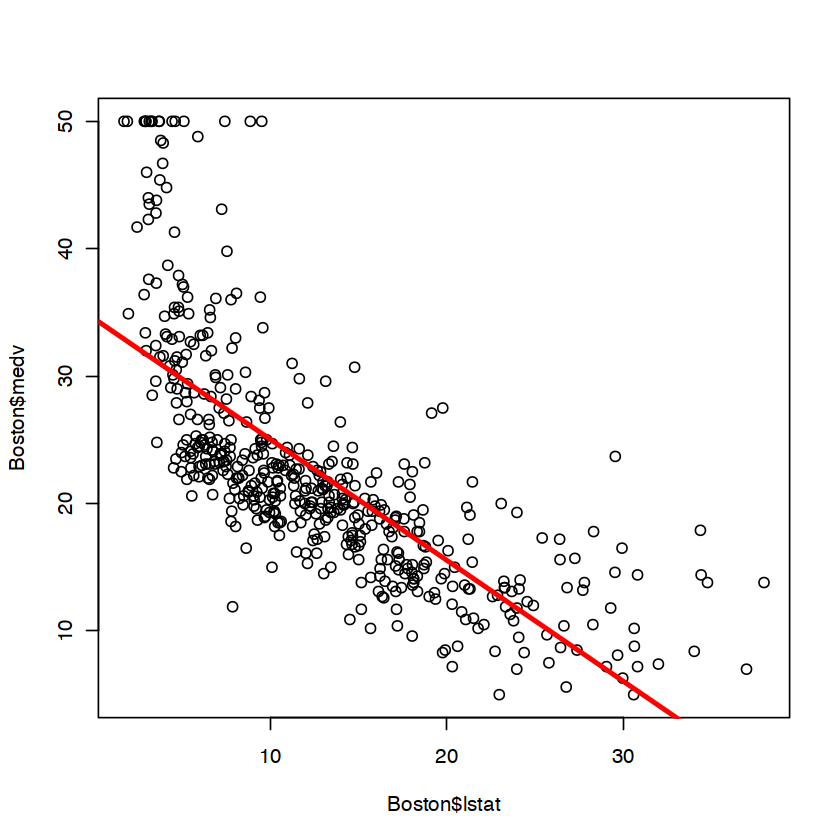

In [19]:
# Basic plot function in R
plot(Boston$lstat, Boston$medv)
abline(lm.fit)
abline(lm.fit, lwd = 3, col = "red")

### Diagnostics

As we can observe, there is some evidence for non-linearity in the relationship between `lstat` and `medv`.
We can examine some diagnostics plots by applying the `plot()` function directly to the output from `lm()`.

- Four plots will be generated

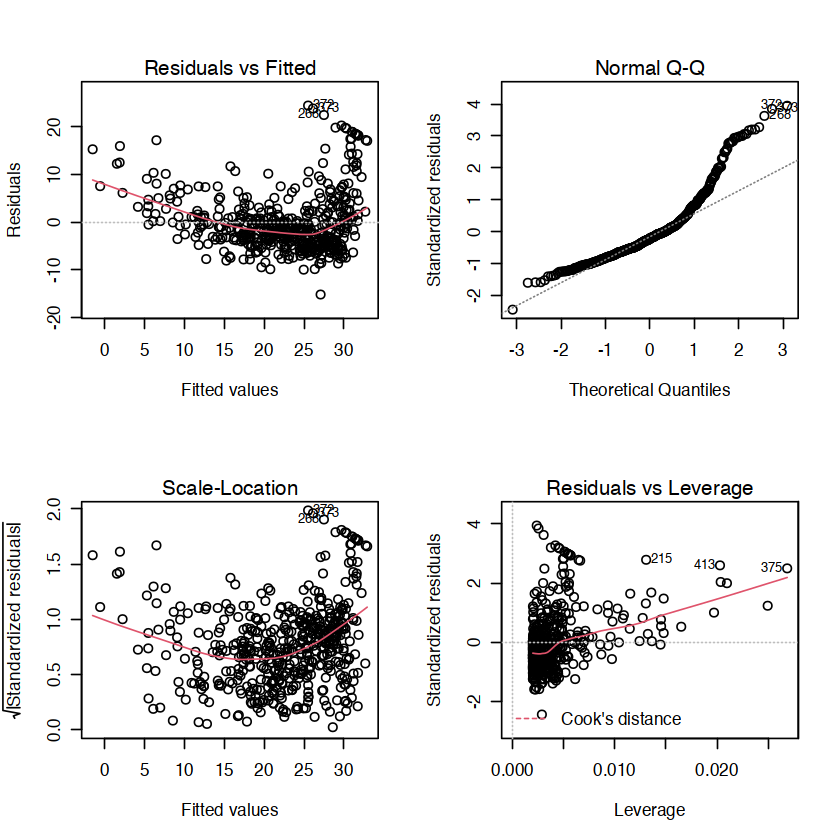

In [20]:
par(mfrow = c(2,2))
plot(lm.fit) # Cook's distance https://en.wikipedia.org/wiki/Cook%27s_distance

- On the basis of the residual plots, there is some evidence of non-linearity. Leverage statistics can be computed for any number of predictors using the `hatvalues()` function.

375 
375

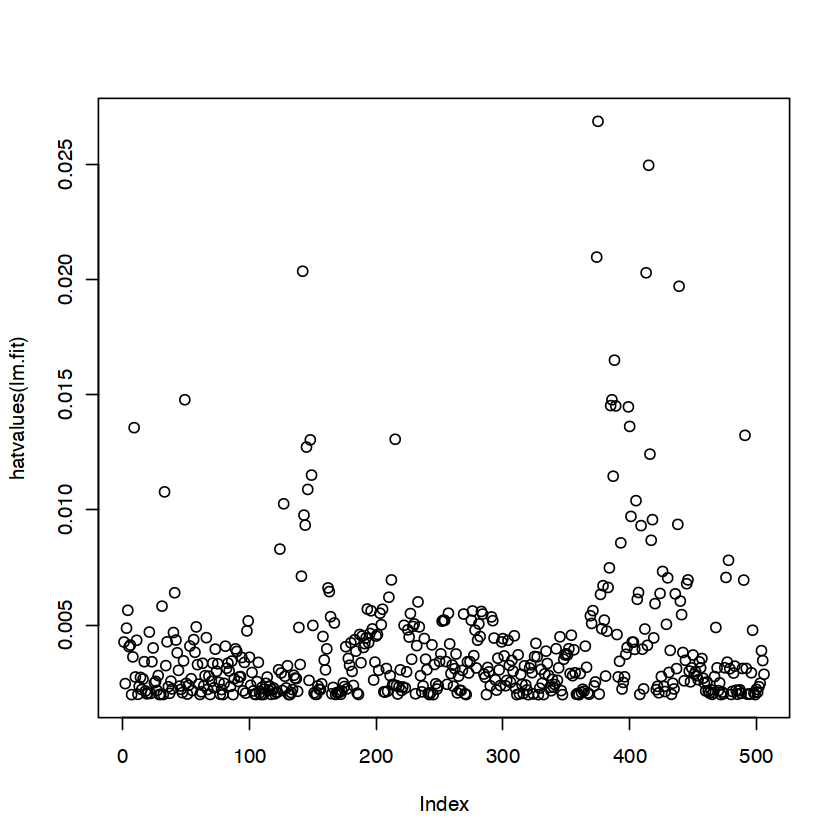

In [21]:
which.max(hatvalues(lm.fit))
plot(hatvalues(lm.fit))

## Multiple Linear Regression

The syntax `lm(y ∼ x1 + x2 + x3)` is used to fit a model with three predictors, $x1$, $x2$, and $x3$.

In [22]:
# Multiple Linear Regression

lm.fit <- lm(medv ~ lstat + age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


- Again, we can compare the results with the one generated by `linReg`.

In [23]:
lm.my <- linReg(data.matrix(cbind(Boston$lstat, Boston$age)), data.matrix(Boston$medv))
lm.my

33.22276053
-1.03206856
0.03454434
45.457881
-21.416330
2.825605
2.943785e-180
8.419554e-73
4.906776e-03


The `Boston` data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors.
Instead, we can use the following short-hand:

In [24]:
lm.fit <- lm(medv ~ ., data = Boston) # Use period to represent all of the predictors
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

What if we would like to perform a regression using all of the variables but one?
For example, in the above regression output, `age` has a high p-value.
So we may wish to run a regression excluding this predictor.
The following syntax results in a regression using all predictors except `age`:

In [25]:
lm.fit.ex.age <- lm(medv ~ . - age, data = Boston) # All predictors except age
summary(lm.fit.ex.age)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

## Interaction terms

It is easy to include interaction terms in a linear model using the `lm()` function.
- The syntax `lstat:black`tells R to include an interaction term between `lstat` and `black`.

In [26]:
summary(lm(medv ~ lstat:age, data = Boston)) # Colon
summary(lm(medv~ lstat + age + lstat:age, data=Boston))


Call:
lm(formula = medv ~ lstat:age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.347  -4.372  -1.534   1.914  27.193 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.1588631  0.4828240   62.46   <2e-16 ***
lstat:age   -0.0077146  0.0003799  -20.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.827 on 504 degrees of freedom
Multiple R-squared:  0.4501,	Adjusted R-squared:  0.449 
F-statistic: 412.4 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ lstat + age + lstat:age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


- The syntax `lstat * age` simultaneously includes `lstat`, `age`, and the interaction term `lstat × age` as predictors
it is a shorthand for `lstat + age + lstat:age`.

In [27]:
summary(lm(medv ~ lstat * age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## Non-linear transformations of the predictors

### Polynomial transformation

Given a predictor $x$, we can create a predictor $x^2$ using `I(x^2)`.

- The function `I()` is needed since the `^` has a special meaning in a formula; wrapping as we do allows the standard usage in R, which is to raise $x$ to the power 2.

We now perform a regression of medv onto `lstat` and `lstat2`.

In [28]:
lm.fit.lstat2 <- lm(medv ~ lstat + I(lstat^2), data = Boston) # Caret
summary(lm.fit.lstat2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


- The near-zero p-value associated with the quadratic term suggests that it leads to an improved model.

- In order to create a cubic fit, we can include a predictor of the form `I(x^3)`.
- However, this approach can start to get cumbersome for higherorder polynomials. 
- A better approach involves using the `poly()` function to create the polynomial within `lm()`.
- For example, the following command produces a fifth-order polynomial fit:

In [29]:
lm.fit.lstat5 <- lm(medv ~ poly(lstat, 5), data = Boston)
summary(lm.fit.lstat5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


### Log transformation

In [30]:
summary(lm(medv ~ log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


# Exercise

This question involves the use of simple linear regression on the `Auto` data set.

- Use the `lm()` function to perform a simple linear regression with `mpg` as the `response` and `horsepower` as the predictor. Use the `summary()` function to print the results. Answer the question:
    - Is there a relationship between the predictor and the response?
    - What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?
- Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables __except__ `name` as the predictors. Use the `summary()` function to print the results. Answer the question:
    - Is there a relationship between the predictors and the response?
    - Which predictors appear to have a statistically significant relationship to the response?
    - What does the coefficient for the `year` variable suggest?
- Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
- Try a few different transformations of the variables, such as $\log(x)$, $\sqrt{x}$, $x^2$. Comment on your findings.

In [31]:
# Solution

head(Auto)
fit_lm <- lm(mpg ~ horsepower, data = Auto)
summary(fit_lm)

predict(fit_lm, data.frame(horsepower = 98), interval = "confidence")
predict(fit_lm, data.frame(horsepower = 98), interval = "prediction")

fit_lm <- lm(mpg ~ . - name, data = Auto)
summary(fit_lm)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500



Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


,fit,lwr,upr
1,24.46708,23.97308,24.96108


,fit,lwr,upr
1,24.46708,14.8094,34.12476



Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16
